# Clustering Analysis

## Hierarchical Density-Based Spatial Clustering of Applications with Noise (HDBSCAN)

An extension to Density-Based Spatial Clustering of Applications with Noise (DBSCAN). Python based package published in 2013.

- clustering based on varying density
- highly scalable -> easily add new dimension/parameter to data
- Only single parameter need to be tuned to obtain the clustering, minimum number of cluster size

This can be a much more efficient "cut-based" method usually done in selecting events in physics experiments. Result in a more cleaner cut than previous methods.

As this is an "unsupervised training" method, we can potentially used this method to obtain new class of events that are unique to others by going each of the classes found.

In [1]:
%%time

from root_pandas import read_root
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (10.0, 8.0)

file_piled = "Piled_2.root"
file_flat = "Flat.root"
file_alpha = "Alpha_11.root"
file_ls = "LS.root"
file_ls_beta = "LS_BETA.root"
file_ref = "RefPulse.root"

file_pre_analysis = "Run009-230-001.root"

files = ["CAT.root"]

def reshape_PSD(x,n,l):
    return x.PSDPara.values.reshape(n,l)

def reshape_Energy(x,n,l):
    return x.Energy.values.reshape(n,l)

def reshape_PSDDoubleP(x,n,l):
    return x.PSDDoubleP.values.reshape(n,l)

def reshape_RatioR(x,n,l):
    return x.RatioR.values.reshape(n,l)

def reshape_DataQuality(x,n,l):
    return x.DataQuality.values.reshape(n,l)
    
PSDPara1 = np.array([])
PSDPara4 = np.array([])
PSDPara7 = np.array([])
PSDPara10 = np.array([])
PSDPara13 = np.array([])
PSDPara18 = np.array([])
Energy = np.array([])
PSDDoubleP = np.array([])
RatioR = np.array([])
Ratio4us = np.array([])
Ratio = np.array([])
DataQuality0 = np.array([])
DataQuality1 = np.array([])
DataQuality2 = np.array([])
DataQuality3 = np.array([])


Label = []

tree = "tree"
for p in files:
    print(p)
    x = read_root(p, tree, columns=["PSDPara"], flatten=["PSDPara"])
    x1 = read_root(p, tree, columns=["Energy"], flatten=["Energy"])
    x2 = read_root(p, tree, columns=["PSDDoubleP"], flatten=["PSDDoubleP"])
    x3 = read_root(p, tree, columns=["RatioR"], flatten=["RatioR"])
    x4 = read_root(p, tree, columns=["Ratio4us"])
    x5 = read_root(p, tree, columns=["Ratio"])
    x6 = read_root(p, tree, columns=["DataQuality"], flatten=["DataQuality"])
    l,h = x.shape
    li=int(l/34)
    y = reshape_PSD(x, li, 34)
    y1 = reshape_Energy(x1, li, 3)
    y2 = reshape_PSDDoubleP(x2, li, 22)
    y3 = reshape_RatioR(x3, li, 3)
    y4 = reshape_DataQuality(x6,li, 4)
    PSDPara1 = np.concatenate((PSDPara1, y[:,1]), axis=0)
    PSDPara4 = np.concatenate((PSDPara4, y[:,4]), axis=0)
    PSDPara7 = np.concatenate((PSDPara7, y[:,7]), axis=0)
    PSDPara10 = np.concatenate((PSDPara10, y[:,10]), axis=0)
    PSDPara13 = np.concatenate((PSDPara13, y[:,13]), axis=0)
    PSDPara18 = np.concatenate((PSDPara18, y[:,18]), axis=0)
    Energy = np.concatenate((Energy, y1[:,1]), axis=0)
    PSDDoubleP = np.concatenate((PSDDoubleP, y2[:,16]), axis=0)
    RatioR = np.concatenate((RatioR, y3[:,1]), axis=0)
    Ratio4us = np.concatenate((Ratio4us, np.squeeze(x4)),axis=0)
    Ratio = np.concatenate((Ratio, np.squeeze(x5)), axis=0)
    DataQuality0 = np.concatenate((DataQuality0, y4[:,0]), axis=0)
    DataQuality1 = np.concatenate((DataQuality1, y4[:,1]), axis=0)
    DataQuality2 = np.concatenate((DataQuality2, y4[:,2]), axis=0)
    DataQuality3 = np.concatenate((DataQuality3, y4[:,3]), axis=0)
    Label.append(li)
    
data_Label = np.array([])
dummy = np.arange(1)

for i in range(1):
    z = np.full((Label[i], ), dummy[i])
    data_Label = np.concatenate((data_Label, z),axis=0)

PSDPara1 = np.expand_dims(PSDPara1, axis=1)
PSDPara4 = np.expand_dims(PSDPara4, axis=1)
PSDPara7 = np.expand_dims(PSDPara7, axis=1)
PSDPara10 = np.expand_dims(PSDPara10, axis=1)
PSDPara13 = np.expand_dims(PSDPara13, axis=1)
PSDPara18 = np.expand_dims(PSDPara18, axis=1)
Energy = np.expand_dims(Energy, axis=1)
PSDDoubleP = np.expand_dims(PSDDoubleP, axis=1)
RatioR = np.expand_dims(RatioR, axis=1)
Ratio4us = np.expand_dims(Ratio4us, axis=1)
Ratio = np.expand_dims(Ratio, axis=1)
DataQuality0 = np.expand_dims(DataQuality0, axis=1)
DataQuality1 = np.expand_dims(DataQuality1, axis=1)
DataQuality2 = np.expand_dims(DataQuality2, axis=1)
DataQuality3 = np.expand_dims(DataQuality3, axis=1)

data = np.concatenate((PSDPara1, PSDPara4, PSDPara7, PSDPara10, PSDPara13, PSDPara18, Energy, PSDDoubleP, RatioR, Ratio4us, Ratio, DataQuality0, DataQuality1, DataQuality2, DataQuality3), axis=1)
print(data.shape)

Welcome to JupyROOT 6.10/02
CAT.root
(774023, 15)
CPU times: user 21.6 s, sys: 2.39 s, total: 24 s
Wall time: 25.9 s


# Approx. 800k events ~ PerSubRun ~ one day

add DataQuality?
add trigger condition?

 0 - PSDPara[1]
 1 - PSDPara[4]
 2 - PSDPara[7]
 3 - PSDPara[10]
 4 - PSDPara[13]
 5 - PSDPara[18]
 6 - Energy
 7 - PSDDoubleP[16]
 8 - RatioR
 9 - Ratio4us
 10 - Ratio
 11 - DataQuality0
 12 - DataQuality1
 13 - DataQuality2
 14 - DataQuality3


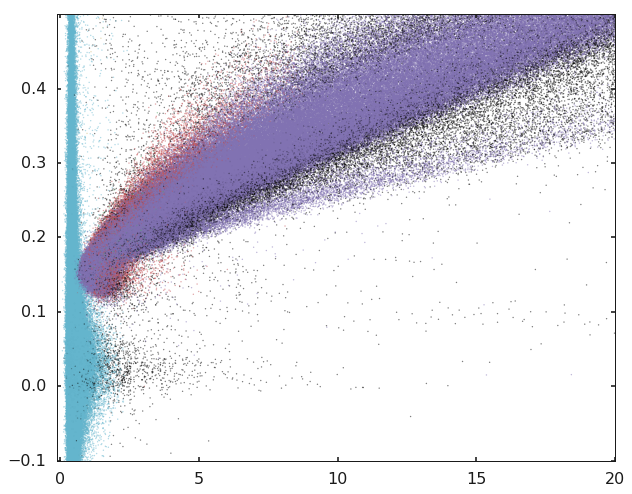

CPU times: user 1min 34s, sys: 24.9 s, total: 1min 59s
Wall time: 4min 8s


In [2]:
%%time
# from sklearn import neighbors

# n_neighbors = 15

# clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform').fit(data,data_Label)

# h = .2

# x_min, x_max = data.min() - 1, data.max() + 1
# y_min, y_max = data.min() - 1, data.max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))
# Z = clf.predict(data)
# print(z)
# Z = Z.reshape(xx.shape)
# plt.figure()
# plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# plt.scatter(data[:1000, 0], data[:1000, 2], c=y, cmap=cmap_bold,
#             edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.show()
import time
import seaborn as sns
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.8, 's' : 5, 'linewidths':0}
import hdbscan

print(" 0 - PSDPara[1]\n 1 - PSDPara[4]\n 2 - PSDPara[7]\n 3 - PSDPara[10]\n 4 - PSDPara[13]\n 5 - PSDPara[18]\n 6 - Energy\n 7 - PSDDoubleP[16]\n 8 - RatioR\n 9 - Ratio4us\n 10 - Ratio\n 11 - DataQuality0\n 12 - DataQuality1\n 13 - DataQuality2\n 14 - DataQuality3")

clusters_labels = hdbscan.HDBSCAN(min_cluster_size=50).fit_predict(data)

plt.figure()
palette = sns.color_palette("deep", np.unique(clusters_labels).max()+1)
colors = [palette[x] if x>=0 else (0,0,0) for x in clusters_labels]
plt.scatter(data[:,0], data[:,9], c=colors, s=2, lw=0, alpha=0.5)
plt.xlim(-0.1,20)
plt.ylim(-0.1,0.5)
plt.show()

# print(clusters_labels[:1000])
# def plot_clusters(data, algorithm, args, kwds):
#     start_time = time.time()
#     labels = algorithm(*args, **kwds).fit_predict(data)
#     end_time = time.time()
#     palette = sns.color_palette('deep', np.unique(labels).max() + 1)
#     colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
#     plt.scatter(data[:,0], data[:,9], c=colors, **plot_kwds)
#     frame = plt.gca()
#     frame.axes.get_xaxis().set_visible(False)
#     frame.axes.get_yaxis().set_visible(False)
# #     plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
# #     plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
#     plt.ylim(-0.5,0.5)
#     plt.xlim(-0.1,15)
#     plt.show()
    
# plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':70})

 0 - PSDPara[1]
 1 - PSDPara[4]
 2 - PSDPara[7]
 3 - PSDPara[10]
 4 - PSDPara[13]
 5 - PSDPara[18]
 6 - Energy
 7 - PSDDoubleP[16]
 8 - RatioR
 9 - Ratio4us
 10 - Ratio
 11 - DataQuality0
 12 - DataQuality1
 13 - DataQuality2
 14 - DataQuality3


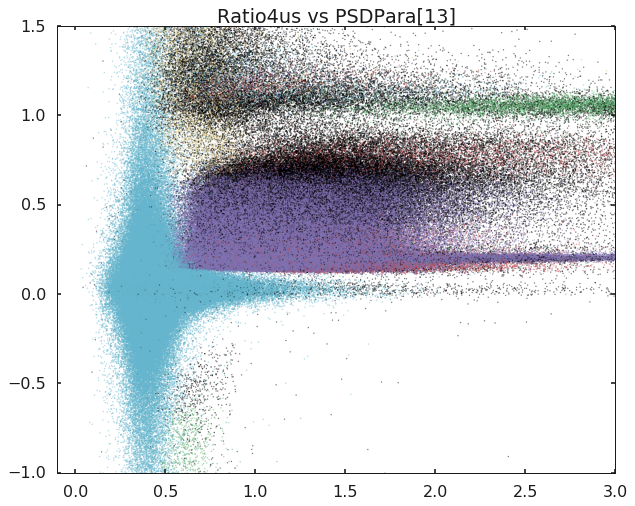

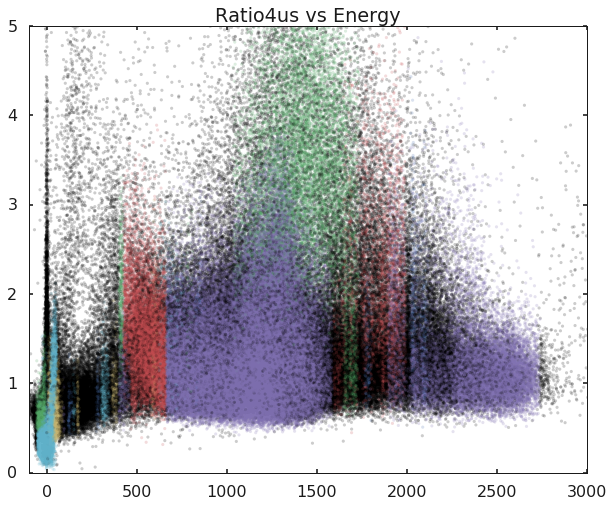

CPU times: user 1min 19s, sys: 10.9 s, total: 1min 30s
Wall time: 1min 22s


In [3]:
%%time
print(" 0 - PSDPara[1]\n 1 - PSDPara[4]\n 2 - PSDPara[7]\n 3 - PSDPara[10]\n 4 - PSDPara[13]\n 5 - PSDPara[18]\n 6 - Energy\n 7 - PSDDoubleP[16]\n 8 - RatioR\n 9 - Ratio4us\n 10 - Ratio\n 11 - DataQuality0\n 12 - DataQuality1\n 13 - DataQuality2\n 14 - DataQuality3")

plt.figure()
plt.title("Ratio4us vs PSDPara[13]")
plt.scatter(data[:,4], data[:,9], c=colors, s=2, lw=0, alpha=0.5)
plt.ylim(-1,1.5)
plt.xlim(-0.1,3)
plt.show()

plt.figure()
plt.title("Ratio4us vs Energy")
plt.scatter(data[:,6], data[:,4], c=colors, s=10, lw=0, alpha=0.2)
plt.ylim(0,5)
plt.xlim(-100,3000)
plt.show()

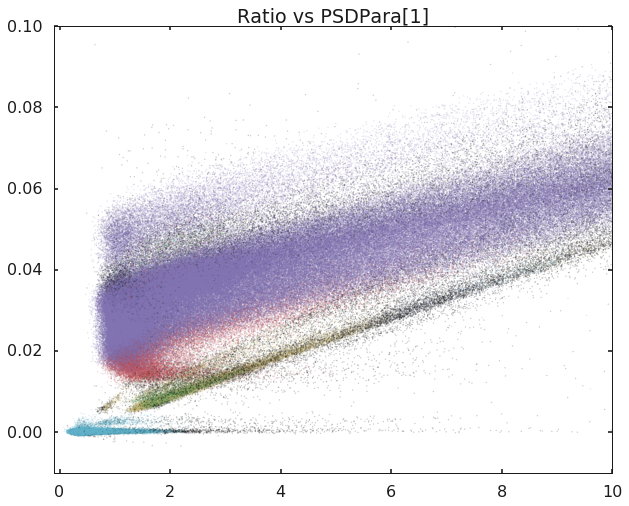

CPU times: user 38.5 s, sys: 4.54 s, total: 43 s
Wall time: 39.9 s


In [4]:
%%time
plt.figure()
plt.title("Ratio vs PSDPara[1]")
plt.scatter(data[:,0], data[:,10], c=colors, s=2, lw=0, alpha=0.2)
plt.ylim(-0.01,0.1)
plt.xlim(-0.1,10)
plt.show()

# Other Clustering method

Koopman kernel?
clustering different kind of signalis possible 